# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 31.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 9.38MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 32.7MB/s]


In [4]:
data = pd.read_csv('./train.csv')
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Посмотрим сколько пропущенных значений в нашем датасете

In [6]:
data.isna().sum()

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

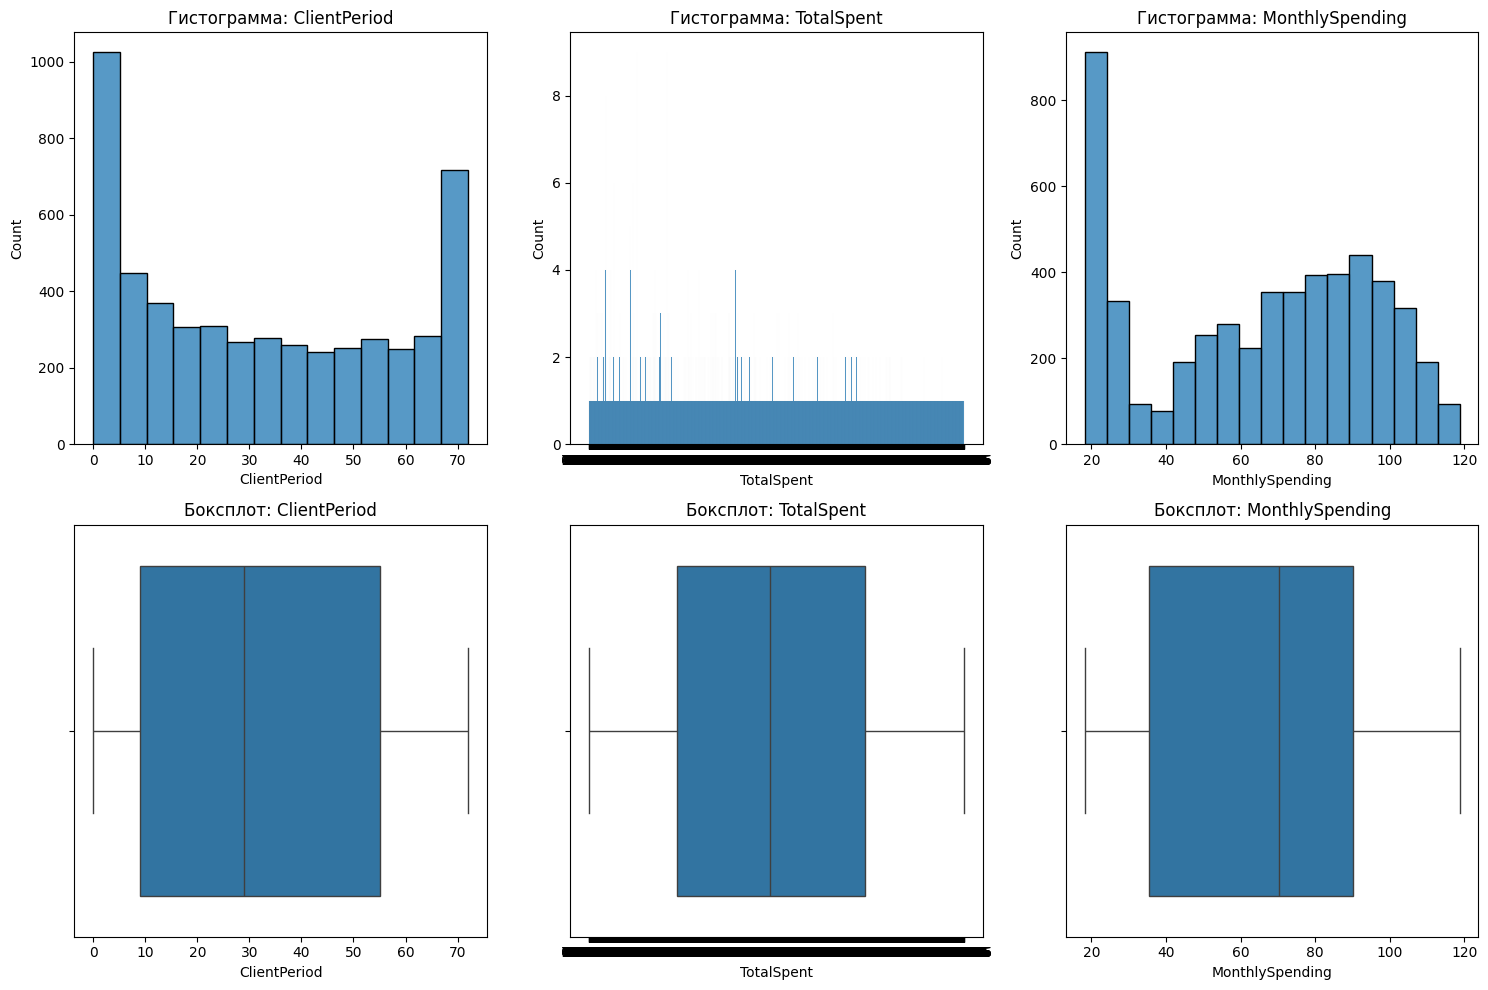

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем фигуру с сеткой 2x3
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Первый ряд: гистограммы
sns.histplot(data, x='ClientPeriod', ax=ax[0, 0])
ax[0, 0].set_title('Гистограмма: ClientPeriod')

sns.histplot(data, x='TotalSpent', ax=ax[0, 1])
ax[0, 1].set_title('Гистограмма: TotalSpent')

sns.histplot(data, x='MonthlySpending', ax=ax[0, 2])
ax[0, 2].set_title('Гистограмма: MonthlySpending')

# Второй ряд: боксплоты
sns.boxplot(data=data, x='ClientPeriod', ax=ax[1, 0])
ax[1, 0].set_title('Боксплот: ClientPeriod')

sns.boxplot(data=data, x='TotalSpent', ax=ax[1, 1])
ax[1, 1].set_title('Боксплот: TotalSpent')

sns.boxplot(data=data, x='MonthlySpending', ax=ax[1, 2])
ax[1, 2].set_title('Боксплот: MonthlySpending')

# Автоматически корректируем отступы
fig.tight_layout()

# Отображаем фигуру
plt.show()

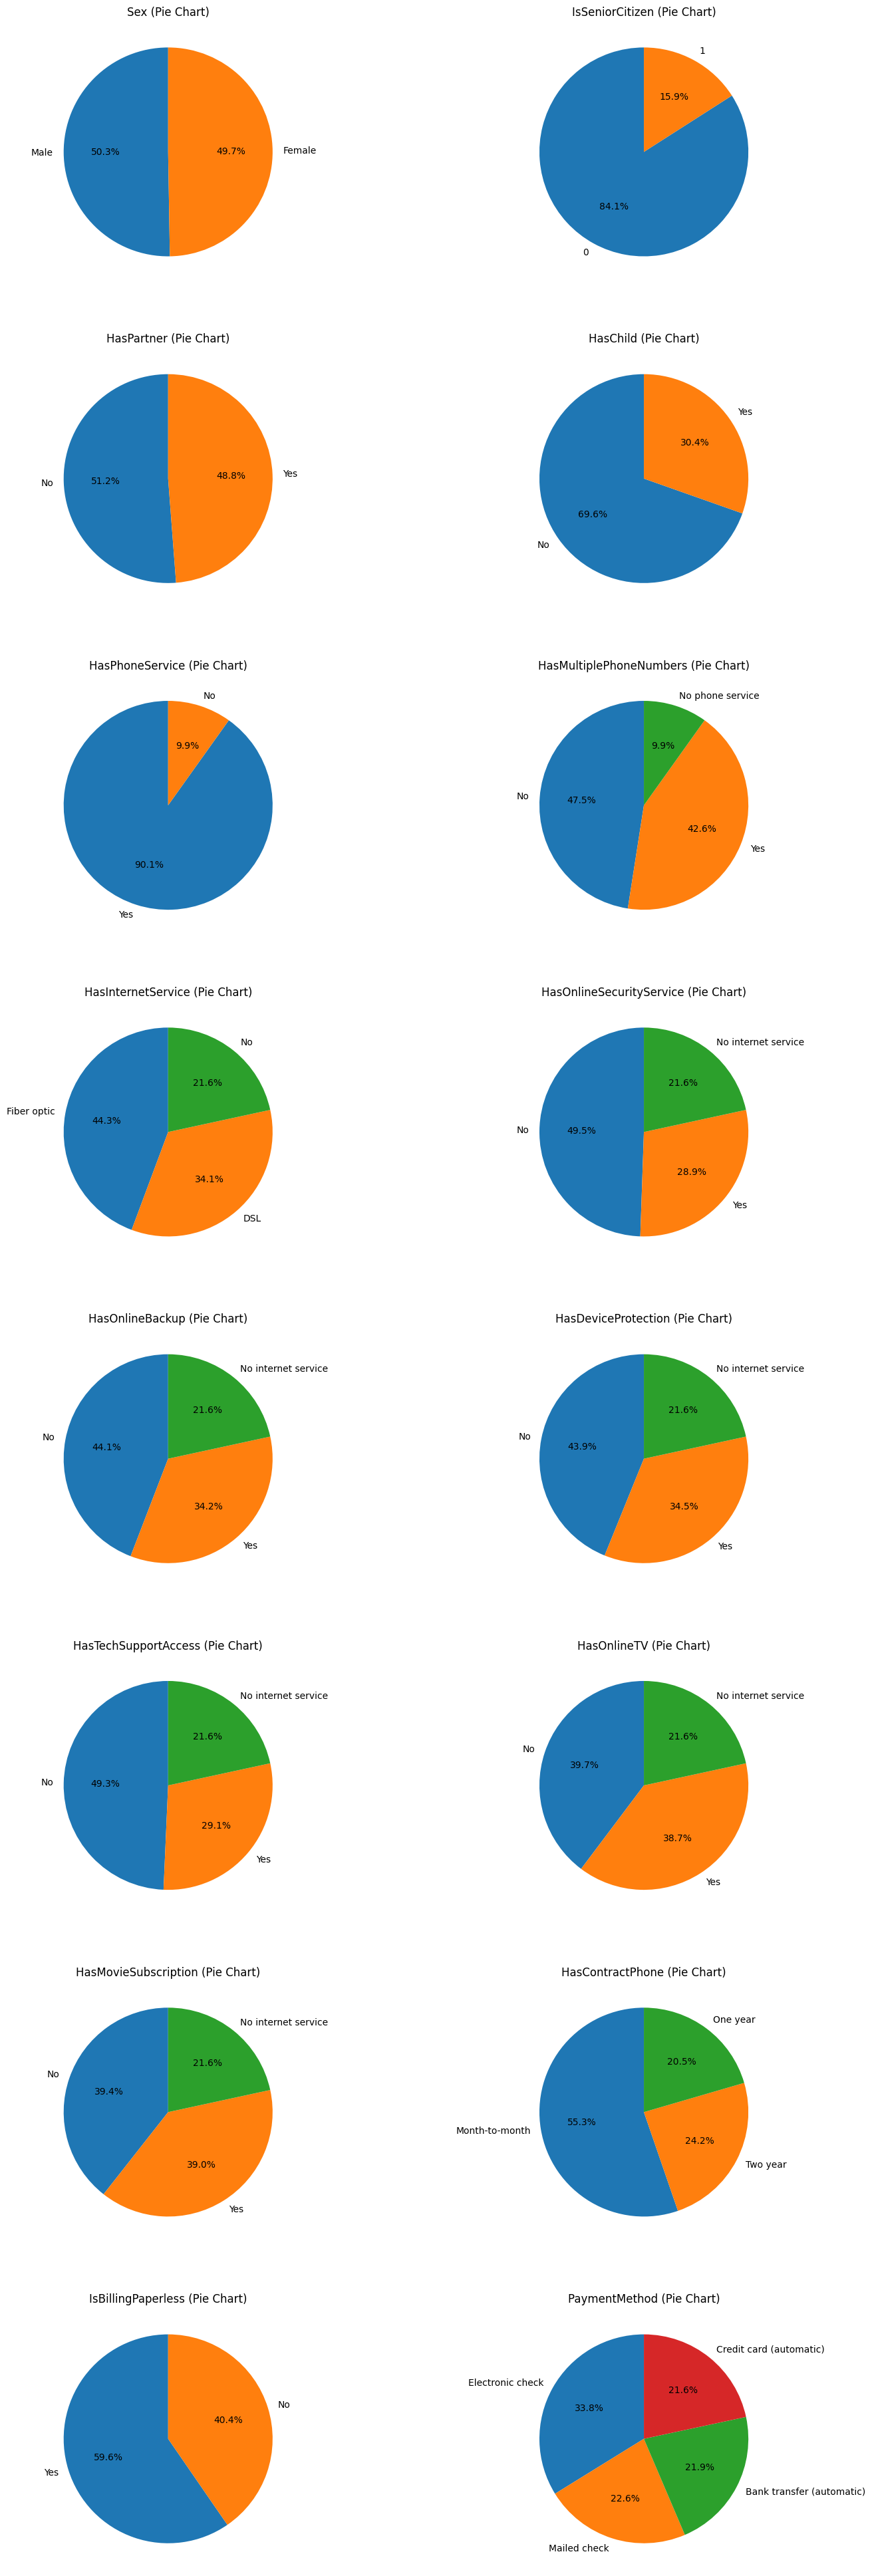

In [8]:
fig, axs = plt.subplots(8, 2, figsize=(15, 40))
fig.tight_layout(pad=5.0)

# Цикл по всем категориальным колонкам
for i, col in enumerate(cat_cols):
    ax = axs[i // 2, i % 2]  # Выбор правильной оси для текущего графика
    counts = data[col].value_counts()  # Подсчет значений

    # Переход между круговой и столбчатой диаграммой в зависимости от уникальных значений
    if len(counts) <= 5:
        ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        ax.set_title(f'{col} (Pie Chart)')
    else:
        ax.bar(counts.index, counts.values)
        ax.set_title(f'{col} (Bar Chart)')
        ax.tick_params(axis='x', rotation=45)  # Поворот меток по оси X

# Отображаем все графики
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [9]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [10]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Инициализация LabelEncoder
encoder = LabelEncoder()

data.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Обновление значений для указанных признаков
columns_to_replace = ['HasDeviceProtection', 'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
                      'HasOnlineSecurityService', 'HasOnlineBackup']
data[columns_to_replace] = data[columns_to_replace].replace('No internet service', -1)
data[columns_to_replace] = data[columns_to_replace].replace('No phone service', -1)

# Кодирование признаков с помощью LabelEncoder
data['HasContractPhone'] = encoder.fit_transform(data['HasContractPhone'])
data['PaymentMethod'] = encoder.fit_transform(data['PaymentMethod'])

# Преобразование TotalSpent в числовой формат
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce').fillna(0).astype(int)

data


<ipython-input-11-8db75b2ba1f3>:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026,Male,0,Yes,Yes,Yes,No,No,-1,-1,-1,-1,-1,-1,1,No,3,0
1,72,25.85,1872,Male,0,Yes,No,Yes,Yes,No,-1,-1,-1,-1,-1,-1,2,No,1,0
2,1,75.90,75,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,0,Yes,2,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,0,No,3,0
4,60,115.25,6758,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,No,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,0,No,2,0
5278,50,44.45,2188,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,1,Yes,0,0
5279,1,55.05,55,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,0,No,3,0
5280,29,76.00,2215,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,0,Yes,1,0


In [12]:
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})
data['HasInternetService'] = data['HasInternetService'].map({'No': 0, 'Fiber optic': 1, 'DSL': 2})

In [13]:
data = data.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

<ipython-input-13-cf6783ad7444>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))


In [14]:
data['HasMultiplePhoneNumbers'] = data['HasMultiplePhoneNumbers'].replace('No phone service', -1)
data.info()
data

<ipython-input-14-6a0f3f29ff09>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['HasMultiplePhoneNumbers'] = data['HasMultiplePhoneNumbers'].replace('No phone service', -1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   int64  
 3   Sex                       5282 non-null   int64  
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   int64  
 6   HasChild                  5282 non-null   int64  
 7   HasPhoneService           5282 non-null   int64  
 8   HasMultiplePhoneNumbers   5282 non-null   int64  
 9   HasInternetService        5282 non-null   int64  
 10  HasOnlineSecurityService  5282 non-null   int64  
 11  HasOnlineBackup           5282 non-null   int64  
 12  HasDeviceProtection       5282 non-null   int64  
 13  HasTechSupportAccess      5282 non-null   int64  
 14  HasOnlin

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026,1,0,1,1,1,0,0,-1,-1,-1,-1,-1,-1,1,0,3,0
1,72,25.85,1872,1,0,1,0,1,1,0,-1,-1,-1,-1,-1,-1,2,0,1,0
2,1,75.90,75,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,2,1
3,32,79.30,2570,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,3,0
4,60,115.25,6758,0,0,1,1,1,1,1,1,1,1,1,1,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82,1,0,0,0,0,-1,2,0,0,0,1,0,0,0,0,2,0
5278,50,44.45,2188,1,0,1,0,0,-1,2,1,0,0,1,1,0,1,1,0,0
5279,1,55.05,55,1,0,0,0,1,0,2,0,0,1,1,0,0,0,0,3,0
5280,29,76.00,2215,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0


In [15]:
X = data.drop('Churn', axis = 1)
y = data.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict_proba(X_test)[:, 1]

print('ROC AUC Score: ', roc_auc_score(y_test, y_preds))

ROC AUC Score:  0.8137207820393237


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логистическая регрессия показала 81.3%. Вполне неплохо

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

До этого я с помощью Optuna подобрал параметры для CatBoost, поэтому ниже задаю их

In [16]:
!pip install catboost
from catboost import CatBoostClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [17]:
df = pd.read_csv('./train.csv')

X = df.drop('Churn', axis = 1)
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

best_params = {
    'iterations': 779,
    'depth': 5,
    'learning_rate': 0.011660355596688057,
    'l2_leaf_reg': 0.07188475351097692,
    'bagging_temperature': 0.3184167302775718,
    'random_strength': 0.9365769491248049,
    'border_count': 66,
    'scale_pos_weight': 0.8419964702299394,
    'verbose': 100,  # Показывает лог каждые 100 итераций
    'random_state': 42,  # Фиксируем случайность для воспроизводимости
    'cat_features': cat_cols
}

# Создаем и обучаем модель с подобранными параметрами
model_cb = CatBoostClassifier(**best_params)

# Обучение на тренировочных данных
model_cb.fit(X_train, y_train)

# Предсказание вероятностей на тестовых данных
y_pred_proba = model_cb.predict_proba(X_test)[:, 1]

# Оценка модели с помощью ROC AUC
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC на тестовой выборке: {roc_auc:.4f}')

0:	learn: 0.6839639	total: 63ms	remaining: 49s
100:	learn: 0.4076808	total: 1.45s	remaining: 9.7s
200:	learn: 0.3786813	total: 2.5s	remaining: 7.18s
300:	learn: 0.3687842	total: 4.12s	remaining: 6.54s
400:	learn: 0.3623413	total: 5.14s	remaining: 4.84s
500:	learn: 0.3570096	total: 7.29s	remaining: 4.05s
600:	learn: 0.3521055	total: 10.5s	remaining: 3.1s
700:	learn: 0.3471408	total: 13.1s	remaining: 1.46s
778:	learn: 0.3427166	total: 15.6s	remaining: 0us
ROC AUC на тестовой выборке: 0.8322


Результат на тестовой выборке - 83.2%

```
best_params = {
    'iterations': 779,
    'depth': 5,
    'learning_rate': 0.011660355596688057,
    'l2_leaf_reg': 0.07188475351097692,
    'bagging_temperature': 0.3184167302775718,
    'random_strength': 0.9365769491248049,
    'border_count': 66,
    'scale_pos_weight': 0.8419964702299394,
    'verbose': 100,  # Показывает лог каждые 100 итераций
    'random_state': 42,  # Фиксируем случайность для воспроизводимости
    'cat_features': cat_cols
}
```



Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [18]:
best_model = model_cb

In [20]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model # используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.

В конечном счете, катбуст выдал отличный результат. На степике модель набрала 85% рок_аук_скор